In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

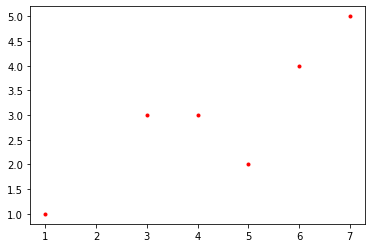

In [2]:
x = np.array([1,5,3,4,7,6])
y = np.array([1,2,3,3,5,4])

plt.plot(x,y,"r.")

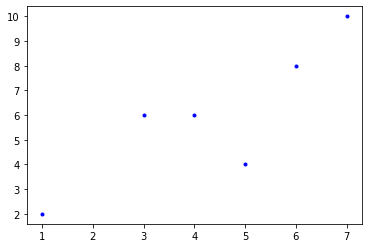

In [3]:
y = y*2
plt.plot(x,y,"b.")
plt.show()

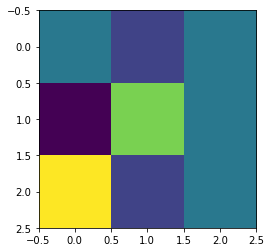

In [4]:
z = np.array( [[3,2,3], [1,5,3], [6,2,3]]  )

plt.imshow(z)

In [5]:
df = pd.read_csv("abalone.csv")

In [6]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
length = df["Length"].to_numpy()
weight = df["Whole weight"].to_numpy()

Text(0, 0.5, 'Weight (g)')

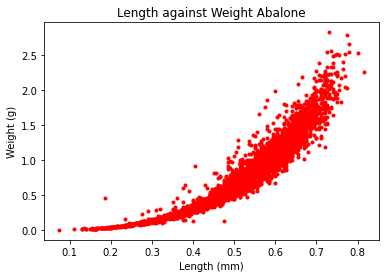

In [8]:
plt.plot(length,weight,"r.")
plt.title("Length against Weight Abalone")
plt.xlabel("Length (mm)")
plt.ylabel("Weight (g)")

Text(0, 0.5, 'Height (cm)')

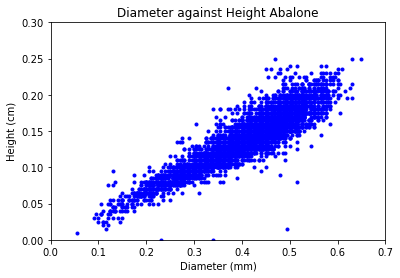

In [9]:
# Loading data into numpy arrays
Diameter = df["Diameter"].to_numpy()
Height = df["Height"].to_numpy()

# Making the matplotlib plot
plt.plot(Diameter,Height,"b.")

# Set the limts for the plot
plt.ylim(0,0.3)
plt.xlim(0,0.7)

# Set title and labels
plt.title("Diameter against Height Abalone")
plt.xlabel("Diameter (mm)")
plt.ylabel("Height (cm)")

In [10]:
m,c = np.polyfit(Diameter,Height,1)

(0.0, 0.7)

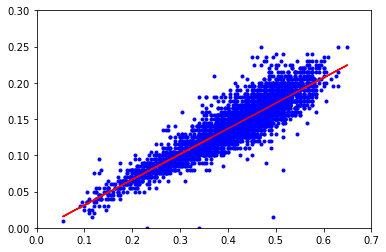

In [11]:
# Making the matplotlib plot
plt.plot(Diameter,Height,"b.")
plt.plot(Diameter,Diameter*m + c,"r-")

# Set the limts for the plot
plt.ylim(0,0.3)
plt.xlim(0,0.7)

Text(0, 0.5, 'Weight (g)')

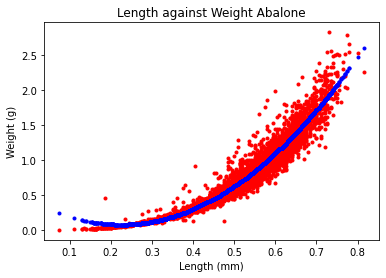

In [12]:
length = df["Length"].to_numpy()
weight = df["Whole weight"].to_numpy()

a, b, c = np.polyfit(length,weight,2)

plt.plot(length,weight,"r.")
plt.plot(length, a*length**2 + b*length + c, "b.")

plt.title("Length against Weight Abalone")
plt.xlabel("Length (mm)")
plt.ylabel("Weight (g)")

In [13]:
print(length)
type(length)

[0.455 0.35  0.53  ... 0.6   0.625 0.71 ]


numpy.ndarray

In [14]:
# Slice data
length[5:]

array([0.425, 0.53 , 0.545, ..., 0.6  , 0.625, 0.71 ])

# This is the start of the second section

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
df = pd.read_csv("clean_abalone_age.csv")
df.head()

,Unnamed: 0,Age,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,15,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,7,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,9,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,10,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,7,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [21]:
Age = df['Age'].to_numpy()
Diameter = df["Diameter"].to_numpy()

In [32]:
x_train, x_test, y_train, y_test = train_test_split(Diameter, Height, test_size = 0.01, random_state = 0)

In [33]:
regr = linear_model.LinearRegression()

In [34]:
regr.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

In [35]:
y_pred = regr.predict(x_test.reshape(-1,1))

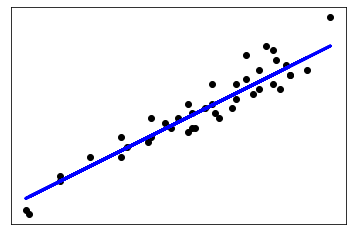

In [36]:
# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [37]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.8f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [0.35116735]
Mean squared error: 0.00020071
Coefficient of determination: 0.89


In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
x_train, x_test, y_train, y_test = train_test_split(Diameter, Height, test_size = 0.01, random_state = 0)

In [40]:
polynomial_features = PolynomialFeatures(degree=2)


In [41]:
x_poly = polynomial_features.fit_transform(x_train.reshape(-1,1))
x_poly_test = polynomial_features.fit_transform(x_test.reshape(-1,1))

In [42]:
model = linear_model.LinearRegression()

In [43]:
model.fit(x_poly, y_train)

LinearRegression()

In [44]:
y_pred_poly = model.predict(x_poly_test)

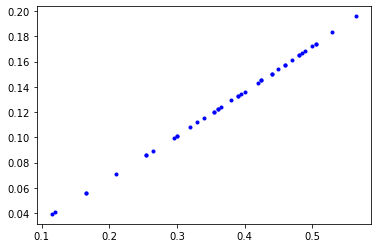

In [45]:
plt.plot(x_test,y_pred_poly,"b.")

In [46]:
df.head()

,Unnamed: 0,Age,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight
0,0,15,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,1,7,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,2,9,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,3,10,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,4,7,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [57]:
X = df.values[:,2:]
y = df.values[:,1]
print(X)

[[1.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [1.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [2.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [1.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [2.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [1.     0.71   0.555  ... 0.9455 0.3765 0.495 ]]


In [49]:
for i in range(5):
    print('X =', X[i, ], ', y =', y[i])

X = [1.     0.455  0.365  0.095  0.514  0.2245 0.101  0.15  ] , y = 15.0
X = [1.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07  ] , y = 7.0
X = [2.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21  ] , y = 9.0
X = [1.     0.44   0.365  0.125  0.516  0.2155 0.114  0.155 ] , y = 10.0
X = [3.     0.33   0.255  0.08   0.205  0.0895 0.0395 0.055 ] , y = 7.0


In [50]:
model_ols = linear_model.LinearRegression(normalize=True)
model_ols.fit(X,y)

LinearRegression(normalize=True)

Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

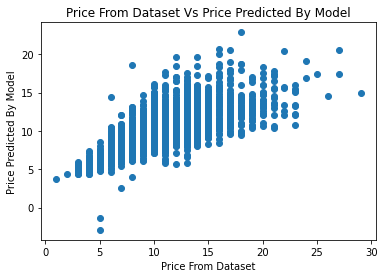

In [52]:
plt.scatter(y, model_ols.predict(X))
plt.plot
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [53]:
ceof = model_ols.coef_
print('coefficient', ceof)

coefficient [ -0.3884832   -0.82639908  11.96403178  11.20449196   9.07020864
 -20.10614364 -10.15510106   8.70110596]


In [54]:
intercept = model_ols.intercept_
print('intercept',intercept)

intercept 4.147747563249365


In [59]:
age = model_ols.predict([[1 ,0.35,    0.265,    0.09,     0.2255,    0.0995,   0.0485,   0.070]])

In [56]:
print(age)

[7.81022316]
